In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import OrderedDict
import pickle
from minisom import MiniSom

In [2]:
vectorizedSentences = []
bestWordsFromSentences = []
with open("data/vectorized_sentences", "rb") as fp:   # Unpickling
    vectorizedSentences = pickle.load(fp)
with open("data/best_words_for_sentences", "rb") as fp:   # Unpickling
    bestWordsFromSentences = pickle.load(fp)
uniqueResultTuples = pd.read_csv("data/unique_result_tuples.csv")

In [3]:
uniqueResultTuples

Unnamed: 0                                      prawo cywilne  \
0      words  [('spadku', 46), ('uchwały', 24), ('spadek', 2...   

                               prawo administracyjne  \
0  [('danych', 48), ('osobowych', 32), ('budowę',...   

                                prawo farmaceutyczne  \
0  [('aptekę', 13), ('receptę', 12), ('zezwolenia...   

                                         prawo pracy  \
0  [('pracownika', 78), ('wypoczynkowego', 29), (...   

                                      prawo medyczne  \
0  [('specjalizacji', 52), ('dodatku', 46), ('cov...   

                                         prawo karne  \
0  [('przesłuchaniu', 23), ('przestępstwa', 9), (...   

                                prawo miädzynarodowe  \
0  [('bezpieczeństwa', 3), ('granicami', 2), ('ar...   

                                     prawo podatkowe  \
0  [('kas', 5), ('fiskalną', 4), ('kasę', 3), ('f...   

                  prawo konstytucyjne  
0  [('konstytucją', 2), ('wyjść', 2)]

In [4]:
def calculate_empty_lists(list: list):
    emptyLists = 0
    for l in list:
        if len(l) == 0:
            emptyLists+=1
    return emptyLists

VECTORIZED SENTENCES

In [5]:
tags = ['prawo cywilne','prawo administracyjne','prawo farmaceutyczne','prawo pracy','prawo medyczne','prawo międzynarodowe','prawo podatkowe','prawo konstytucyjne','prawo karne','inne']
colors = ['orange','red','blue','green','cyan','brown','black','purple','pink','#42458f']
def get_category_index(vector):
    index = 0
    value = 0
    for i, v in enumerate(vector):
        if v > value:
            value = v
            index = i
    return index

In [6]:
W = np.array(vectorizedSentences)

In [7]:
map_dim = 20
som = MiniSom(map_dim, map_dim, 10, sigma=1.0, random_seed=1)
# som.random_weights_init(W)
som.train_batch(W, num_iteration=len(W)*100, verbose=True)

 [ 267200 / 267200 ] 100% - 0:00:00 left 
 quantization error: 0.0030924780221774327


In [8]:
def get_best_word_from_list(affair: str,words: list):
    if affair == 'prawo międzynarodowe':
        affair = 'prawo miädzynarodowe'
    b = eval(uniqueResultTuples[affair][0])
    value = 0
    result = ''
    for word in words:
        for tuple in b:
            if tuple[0] == word and tuple[1] > value:
                value = tuple[1]
                result = word
    if len(words) > 0 and result == '':
        result = words[0]
    return result

In [9]:
def change_best_words_to_best_word():
    result = []
    for i,list in enumerate(bestWordsFromSentences):
        categoryIndex = get_category_index(vectorizedSentences[i])
        category = tags[categoryIndex]
        result.append(get_best_word_from_list(category,list))
    return result
bestWordsFromSentences = change_best_words_to_best_word()

In [10]:
bestWordsFromSentences

['lokali',
 'pomieszczenie',
 '',
 'niepełnosprawnych',
 'uchwałą',
 'uchwały',
 'jaką',
 'skład',
 'uchwały',
 'uchwały',
 'lokali',
 'wprowadzić',
 'lokali',
 '',
 'wybudować',
 'uchwały',
 'uchwały',
 '',
 'właścicielka',
 'parkingowym',
 'naprawy',
 'starego',
 'ogrodzenia',
 'zarządca',
 'bankowych',
 'osobowe',
 'głosów',
 'kosztach',
 'wymienić',
 'roszczenie',
 'prac',
 'budowlanego',
 'salonu',
 'wieczystej',
 'utraconego',
 '',
 'podejrzeniem',
 'stażysta',
 'będzie',
 'zawodowego',
 'dziedziczenia',
 'zatrudniona',
 'zaległe',
 'pani',
 '',
 '',
 'skład',
 'roszczenia',
 '',
 'pracować',
 '',
 '',
 'przyjęcia',
 'farmacji',
 'drugą',
 'własną',
 'winna',
 'własną',
 '',
 'lekarza',
 'charakterze',
 '',
 'zakazu',
 'szpitalem',
 'podpisanie',
 '',
 'oblicza',
 'właścicielu',
 'pracować',
 'zadań',
 'karnym',
 'skrócenia',
 'równoważnym',
 '',
 'dokumentację',
 '',
 'tomografii',
 'zezwolenia',
 'ochrona',
 'szpitalnej',
 'kategorii',
 'przestępstwa',
 'innych',
 'doprowadzić'

In [11]:
def remove_elements_from_list_by_indexes(list: list, indexes: list):
    result = []
    for i,l in enumerate(list):
        if i not in indexes:
            result.append(l)
    return result

In [12]:
def get_indexes_of_repeated_words():
    toRemove = []
    for i,word in enumerate(bestWordsFromSentences):
        for i2, word2, in enumerate(bestWordsFromSentences):
            if i != i2 and i2 > i and word == word2:
                toRemove.append(i2)
    return toRemove

indexesToRemove = get_indexes_of_repeated_words()
indexesToRemove = [*set(indexesToRemove)]
print('Got {} repeated words to delete from {}'.format(len(indexesToRemove),len(bestWordsFromSentences)))
bestWords = remove_elements_from_list_by_indexes(bestWordsFromSentences,indexesToRemove)
vectors =  remove_elements_from_list_by_indexes(vectorizedSentences,indexesToRemove)

Got 1608 repeated words to delete from 2672


In [13]:
def get_indexes_of_empty_words(list):
    toRemove = []
    for i,word in enumerate(list):
        if word == '':
            toRemove.append(i)
    return toRemove
indexesToRemove = get_indexes_of_empty_words(bestWords)
print('Got {} empty words to delete from {}'.format(len(indexesToRemove),len(bestWords)))
bestWords = remove_elements_from_list_by_indexes(bestWords,indexesToRemove)
vectors =  remove_elements_from_list_by_indexes(vectors,indexesToRemove)

Got 1 empty words to delete from 1064


In [14]:
print('{} == {}'.format(len(bestWords),len(vectors)))
bestWords

1063 == 1063


['lokali',
 'pomieszczenie',
 'niepełnosprawnych',
 'uchwałą',
 'uchwały',
 'jaką',
 'skład',
 'wprowadzić',
 'wybudować',
 'właścicielka',
 'parkingowym',
 'naprawy',
 'starego',
 'ogrodzenia',
 'zarządca',
 'bankowych',
 'osobowe',
 'głosów',
 'kosztach',
 'wymienić',
 'roszczenie',
 'prac',
 'budowlanego',
 'salonu',
 'wieczystej',
 'utraconego',
 'podejrzeniem',
 'stażysta',
 'będzie',
 'zawodowego',
 'dziedziczenia',
 'zatrudniona',
 'zaległe',
 'pani',
 'roszczenia',
 'pracować',
 'przyjęcia',
 'farmacji',
 'drugą',
 'własną',
 'winna',
 'lekarza',
 'charakterze',
 'zakazu',
 'szpitalem',
 'podpisanie',
 'oblicza',
 'właścicielu',
 'zadań',
 'karnym',
 'skrócenia',
 'równoważnym',
 'dokumentację',
 'tomografii',
 'zezwolenia',
 'ochrona',
 'szpitalnej',
 'kategorii',
 'przestępstwa',
 'innych',
 'doprowadzić',
 'zrezygnować',
 'wziąć',
 'nabywcą',
 'poszczególnych',
 'wody',
 'ubezwłasnowolniona',
 'zakładowego',
 'zmiana',
 'zwolnioną',
 'podmiocie',
 'obniżyć',
 'pobierającego'

[]

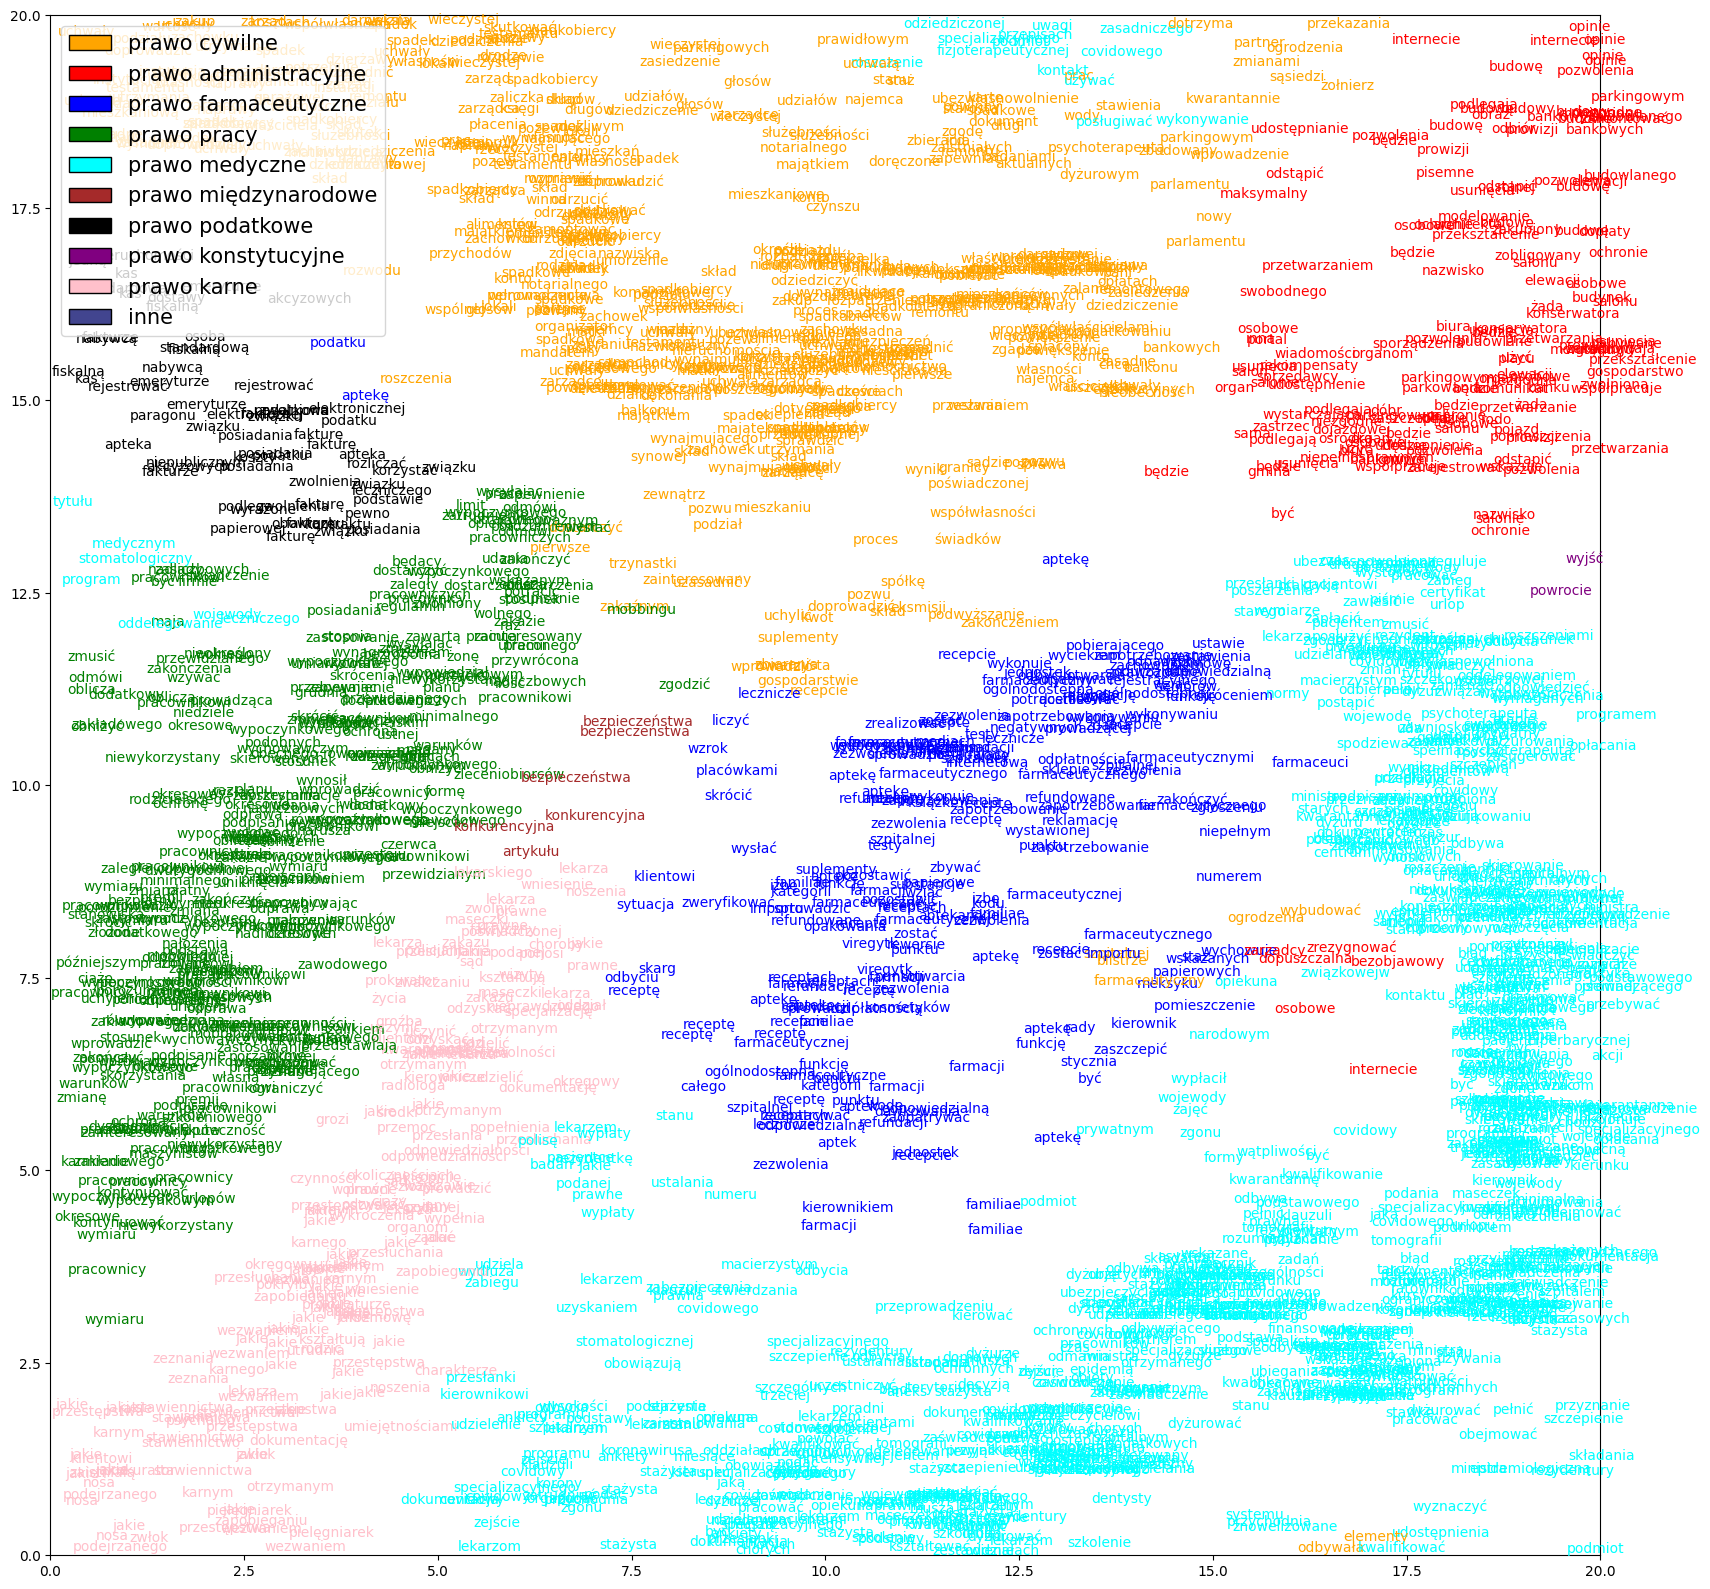

In [15]:
import ast
from matplotlib.patches import Patch
legend_elements = []
for index,color in enumerate(colors):
    c = colors[index]
    l = tags[index]
    legend_elements.append(Patch(facecolor=c, edgecolor='black',label=l))
plt.figure(figsize=(20, 20))
texts = []
for i,vec in enumerate(vectorizedSentences):
    affairIndex = get_category_index(vec)
    c = colors[affairIndex]
    winnin_position = som.winner(vec)
    text = ''
    if len(bestWordsFromSentences[i]) > 0:
        text = bestWordsFromSentences[i]
    if text != "":
        texts.append(plt.text((winnin_position[0]+np.random.rand()*.9)%map_dim, (winnin_position[1]+np.random.rand()*.9)%map_dim, text, color=c))

plt.legend(handles=legend_elements, loc='upper left',prop={'size': 15})
# plt.xticks(range(map_dim))
# plt.yticks(range(map_dim))
# plt.grid()
plt.xlim([0, map_dim])
plt.ylim([0, map_dim])
plt.plot()

[]

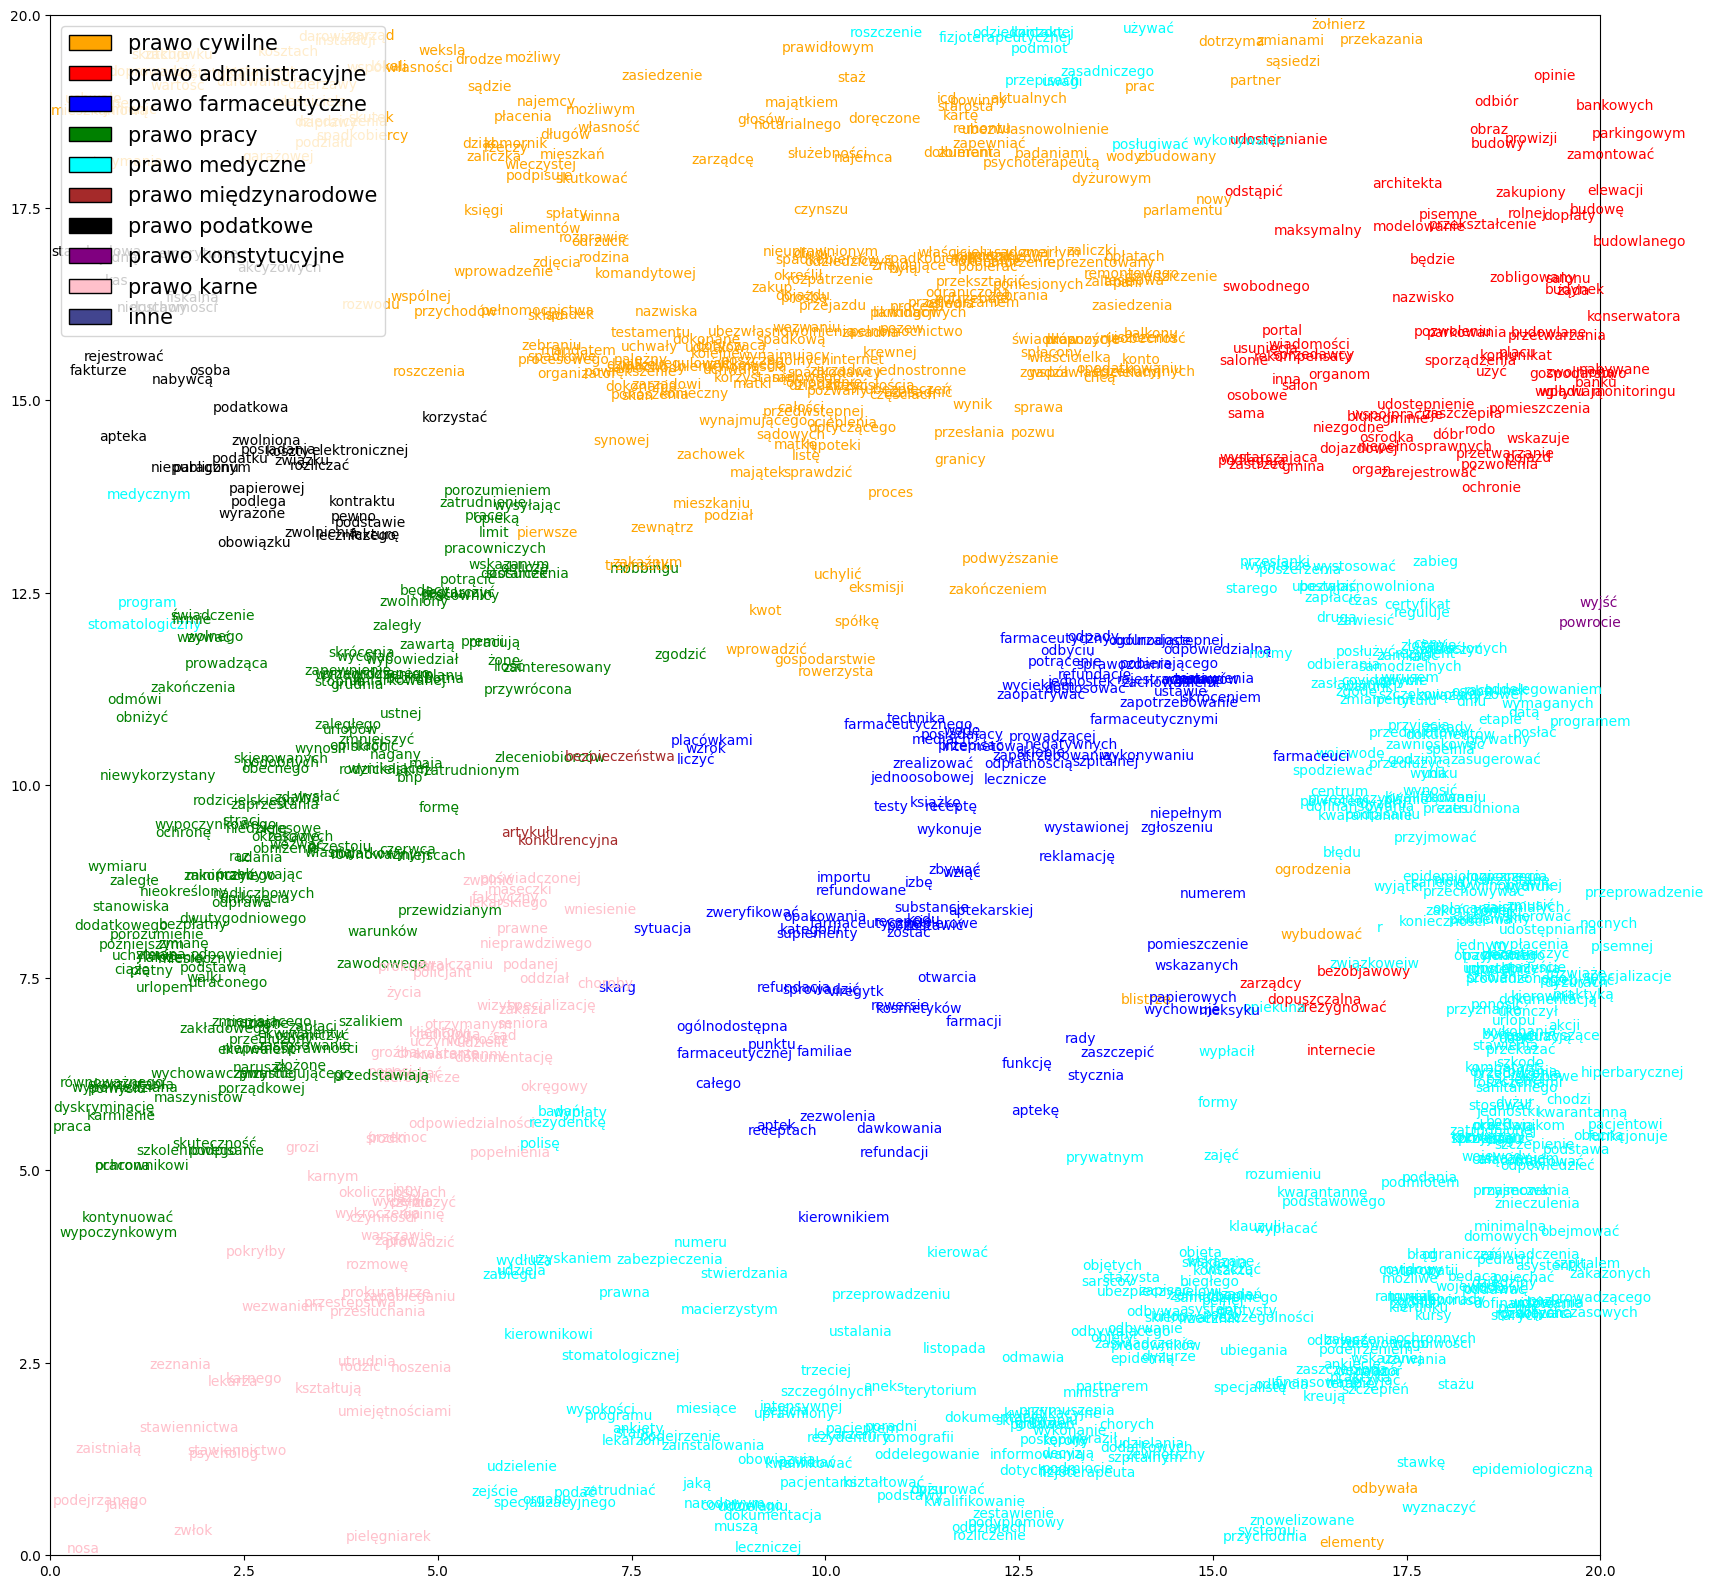

In [16]:
import ast
from matplotlib.patches import Patch
legend_elements = []
for index,color in enumerate(colors):
    c = colors[index]
    l = tags[index]
    legend_elements.append(Patch(facecolor=c, edgecolor='black',label=l))
plt.figure(figsize=(20, 20))
texts = []
for i,vec in enumerate(vectors):
    affairIndex = get_category_index(vec)
    c = colors[affairIndex]
    winnin_position = som.winner(vec)
    text = bestWords[i]
    if text != "":
        texts.append(plt.text((winnin_position[0]+np.random.rand()*.9)%map_dim, (winnin_position[1]+np.random.rand()*.9)%map_dim, text, color=c))

plt.legend(handles=legend_elements, loc='upper left',prop={'size': 15})
# plt.xticks(range(map_dim))
# plt.yticks(range(map_dim))
# plt.grid()
plt.xlim([0, map_dim])
plt.ylim([0, map_dim])
plt.plot()

DIGRAPH

In [17]:
from graphviz import Digraph

In [18]:
def get_category_indexes(vector):
    index = 0
    value = 0
    result = []
    for i, v in enumerate(vector):
        if v > value:
            value = v
            index = i
    for i, v in enumerate(vector):
        if v == value:
            result.append(i)
    return result

In [19]:
graph = Digraph('IUI')
categories = ['prawo cywilne','prawo administracyjne','prawo farmaceutyczne','prawo pracy','prawo medyczne','prawo międzynarodowe','prawo podatkowe','prawo konstytucyjne','prawo karne']
nodes = []
graph.format = 'svg'
# Add basic nodes for legal affairs
for i, category in enumerate(categories):
    letter = chr(ord('@')+(i+1))
    graph.node(letter, category)

# Add words from vectors
for i, vec in enumerate(vectors):
    nodeId = "{}".format(i)
    text = nodeId
    text = bestWords[i]
    categoryIndexes = get_category_indexes(vec)
    if len(categoryIndexes) == 0 or text == nodeId:
        continue
    graph.node(nodeId,text)
    for index in categoryIndexes:
        graph.edge(chr(ord('@')+(index+1)),nodeId)

resultGraph = graph.unflatten(stagger=70)

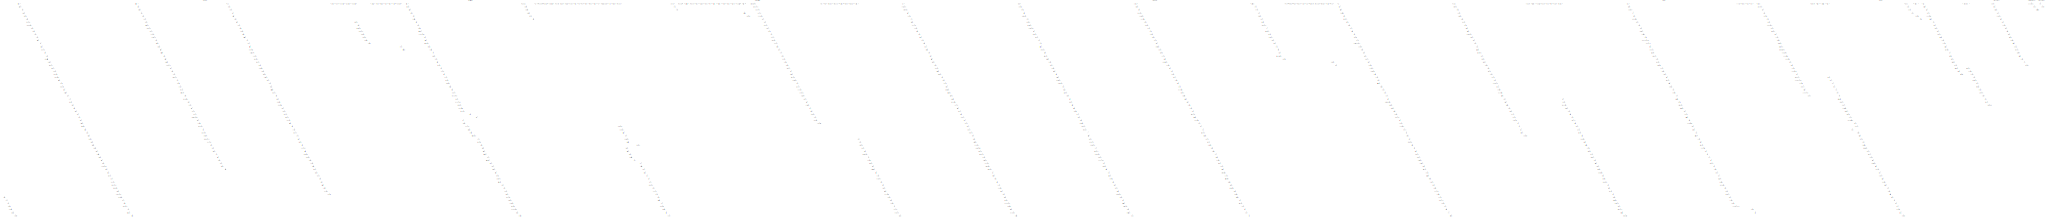

In [20]:
resultGraph

In [21]:
graph.render(directory='output').replace('\\','/')

'output/IUI.gv.svg'

NETWORK GRAPH

In [37]:
import plotly.graph_objects as go

import networkx as nx


G = nx.Graph()

categories = ['prawo cywilne','prawo administracyjne','prawo farmaceutyczne','prawo pracy','prawo medyczne','prawo międzynarodowe','prawo podatkowe','prawo konstytucyjne','prawo karne']
categories_positions = [[8,17],[18,16.5],[11.5,8],[2.5,8],[15.5,3],[6,10],[3,14],[19.5,13],[3,3]]
# Add basic nodes for legal affairs
for i, category in enumerate(categories):
    G.add_node(category)

# Add words from vectors
for i, vec in enumerate(vectors):
    categoryIndexes = get_category_indexes(vec)
    if len(categoryIndexes) == 0:
        continue
    w = bestWords[i]
    if len(w) == 1:
        continue
    G.add_node(w)
    for index in categoryIndexes:
        G.add_edge(categories[index],w)

nodes_to_remove = []
for n in G.nodes:
    if type(n) is int:
        nodes_to_remove.append(n)
        continue
    if n not in categories:
        indexOfWord = [x for x in range(len(bestWords)) if bestWords[x] == n][0]
        winner =  som.winner(vectors[indexOfWord])
        G.nodes[n]['pos'] = (winner[0]+np.random.rand()*.9,winner[1]+np.random.rand()*.9)
    else:
        ind = [x for x in range(len(categories)) if categories[x] == n][0]
        G.nodes[n]['pos'] = categories_positions[ind]

for ntr in nodes_to_remove:
    G.remove_node(ntr)

fig = go.Figure(
            layout=go.Layout(
            title='Words segregated by legal affairs + connections between them',
            titlefont=dict(size=16),
            showlegend=False,
            hovermode='closest',
            hoverlabel=dict(
                namelength=-1,
                font=dict(size=10),
            ),
            margin=dict(b=21, l=5, r=5, t=40),
            annotations=[dict(
                text="",
                showarrow=False,
                xref="paper", yref="paper")],
            xaxis=dict(showgrid=False, zeroline=False,showticklabels=False, mirror=True),
            yaxis=dict(showgrid=False, zeroline=False,
showticklabels=False, mirror=True)))

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    fig.add_trace(go.Scatter(
    x=tuple([x0, x1, None]),
    y=tuple([y0, y1, None]),
    line=dict(width=1, color='darkgrey'),
    mode='lines'))


for g_index, node in enumerate(G.nodes()):
    x, y = G.nodes[node]['pos']
    color = 'silver'
    border_color = 'black'
    border_width = 2
    size = 40
    text = ''
    name = node
    if g_index > 8:
        word_index = [x for x in range(len(bestWords)) if bestWords[x] == node][0]
        vector = vectors[word_index]
        ind = get_category_index(vector)
        color = colors[ind]
        size = 10
        border_color = 0
        indexes = get_category_indexes(vector)
        cats = [categories[k] for k in indexes]
        name = '{} | {}\n'.format(name,cats)
    else:
        color = colors[g_index]
        text = str(node).split(' ')[1]

    fig.add_trace(go.Scatter(
    x=[x],
    y=[y],
    text=text,
    name=name,
    mode='markers+text',
    hoverinfo='name',
    marker=dict(
        showscale=True,
        reversescale=True,
        color=color,
        size=size,
        colorbar=dict(
            thickness=1,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(
            color=border_color,
            width = border_width
        ))))

fig.show()